### Accessing ERA5, CMIP6 and UKCP18 data to obtain a climate temperature overview of Hampsire in the UK

##### Plotting Temperature Change Over A Period, t

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import cdsapi
import xarray
from tqdm import tqdm

#### Loading in the ERA5 Data

In [268]:
# load in the ERA5 1980-2023 monthly average data 
era5_monthly_avg = xarray.open_dataset("../downloads/ERA5/era5_monthly_avg_4var_1980_2023.nc")
era5_monthly_avg

<xarray.Dataset>
Dimensions:    (longitude: 173, latitude: 118, expver: 2, time: 528)
Coordinates:
  * longitude  (longitude) float32 -12.61 -12.51 -12.41 ... 4.39 4.49 4.59
  * latitude   (latitude) float32 60.53 60.43 60.33 60.23 ... 49.03 48.93 48.83
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-12-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-24 09:32:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [269]:
# lets look at the dims
pprint(era5_monthly_avg.dims)

# GRID DIMENSIONS:
# We have a 0.1,0.1 degree resolution in the extract.
# the area that we extracted is: 60.57, -12.61, 48.83, 4.59
# the absolute latitude difference is 60.57 - 48.83 = 11.74 / 0.1 ~ 118  # print(11.74 / 0.1)
# the absolute longitude difference is -12.61 - 4.59 ~ 173  / 0.1 ~ 118  # print(17.2 / 0.1)
# this means we have a grid of 173 x 118 = 20414

# TIME DIMENSIONS:
# We have 524 time dimension
# 528 = 12 months * (2024 - 1980) years (=44) --> 528 = 12 * 44

FrozenMappingWarningOnValuesAccess({'longitude': 173, 'latitude': 118, 'expver': 2, 'time': 528})


In [270]:
print(era5_monthly_avg.var)

<bound method DatasetAggregations.var of <xarray.Dataset>
Dimensions:    (longitude: 173, latitude: 118, expver: 2, time: 528)
Coordinates:
  * longitude  (longitude) float32 -12.61 -12.51 -12.41 ... 4.39 4.49 4.59
  * latitude   (latitude) float32 60.53 60.43 60.33 60.23 ... 49.03 48.93 48.83
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-12-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 ...
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-24 09:32:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...>


In [271]:
# convert K to degC
era5_monthly_avg["t2m"].values = era5_monthly_avg["t2m"].values - 273.15

In [272]:
era5_monthly_avg["t2m"].attrs["units"] = 'degC'

In [273]:
era5_monthly_avg['t2m'].shape

(528, 2, 118, 173)

In [274]:
VARIABLE = 't2m'

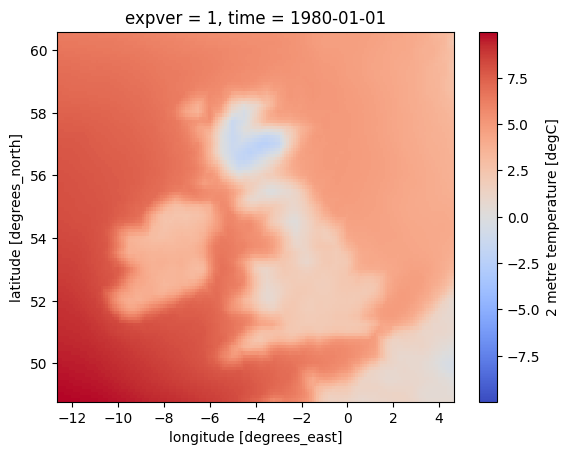

In [275]:
# plotting the 1st timeslice of 20414 grid points 
era5_monthly_avg[VARIABLE][0, 0, :, :].plot(cmap='coolwarm')

In [276]:
def get_coords_within_lat_long_bounding_box(lat_vals, long_vals, lat_lims, long_lims):
    ''''''
    # create lat, long frid
    xv, yv = np.meshgrid(long_vals, lat_vals)
    in_coords = []
    for i, (x, y) in enumerate(zip(xv.flatten(), yv.flatten())):
        if ((x >= long_lims[0]) & (x <= long_lims[-1])) & ((y >= lat_lims[0]) & (y <= lat_lims[-1])):
            in_coords.append((x, y))

    return in_coords, xv, yv

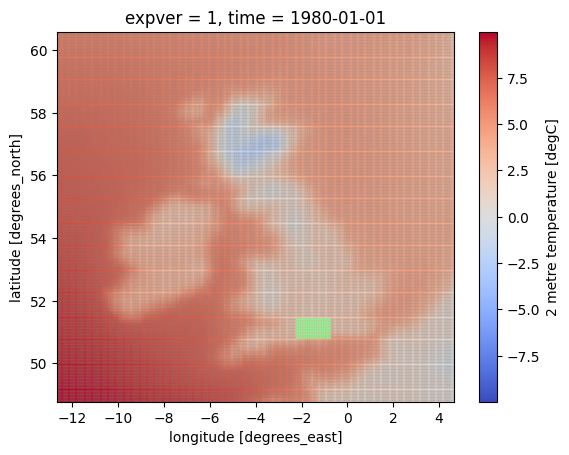

In [277]:
# cropping the region to only contain hampshire data
coords, x_grid, y_grid = get_coords_within_lat_long_bounding_box(lat_vals=era5_monthly_avg["latitude"].values,
                                                                 long_vals=era5_monthly_avg["longitude"].values, 
                                                                 lat_lims=[50.8, 51.5],
                                                                 long_lims=[-2.25, -0.75])

fig, ax = plt.subplots()
era5_monthly_avg[VARIABLE][0, 0, :, :].plot(ax=ax, cmap='coolwarm')
ax.scatter(x_grid, y_grid, marker='o', color='grey', s=2, alpha=0.2)
ax.scatter([i[0] for i in coords], [i[-1] for i in coords], marker='*', color='lightgreen', s=1)

In [278]:
era5_monthly_avg[VARIABLE].shape

(528, 2, 118, 173)

In [279]:
lat_lims=[50.8, 51.5]
long_lims=[-2.25, -0.75]
era_cropped = era5_monthly_avg.sel(latitude=slice(lat_lims[-1], lat_lims[0]),
                                   longitude=slice(long_lims[0], long_lims[-1]))

era_cropped

<xarray.Dataset>
Dimensions:    (longitude: 15, latitude: 7, expver: 2, time: 528)
Coordinates:
  * longitude  (longitude) float32 -2.21 -2.11 -2.01 -1.91 ... -1.01 -0.91 -0.81
  * latitude   (latitude) float32 51.43 51.33 51.23 51.13 51.03 50.93 50.83
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-12-01
Data variables:
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    t2m        (time, expver, latitude, longitude) float32 2.188 2.138 ... 8.99
    tp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-24 09:32:26 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

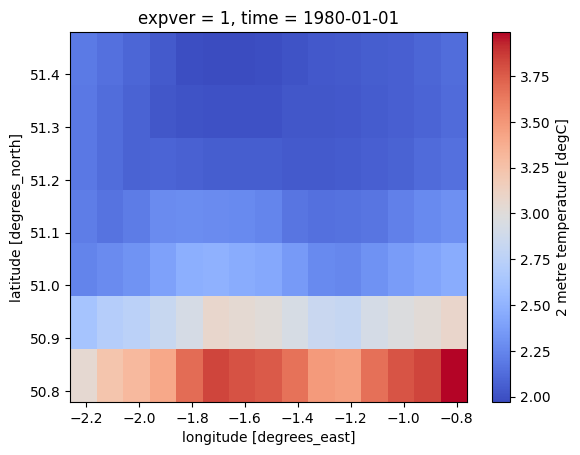

In [280]:
era_cropped[VARIABLE][0, 0, :, :].plot(cmap='coolwarm')

(44, 12)


Text(0.5, 1.0, 'ERA5 Monthly Average Data for t2m between 1980-2023')

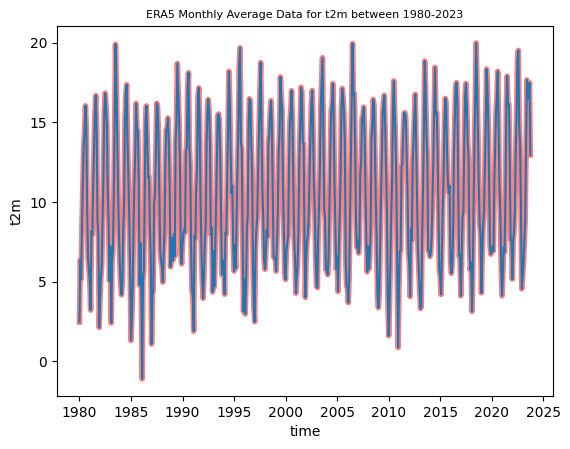

In [281]:
fig, ax = plt.subplots()

# using matplotlib
mus = era_cropped[VARIABLE][:, 0, :, :].values.reshape(44, 12, 7, 15)[:, :, :, :].mean(axis=(2, 3))
print(mus.shape)
ax.plot(era_cropped.time.values, mus[:44+1, :].flatten(), color='r', linewidth=4, alpha=0.5)

# direct plot using xarray functionality
era_cropped[VARIABLE][:, 0, :, :].mean(axis=(1, 2)).plot(ax=ax)


ax.set_title(f'ERA5 Monthly Average Data for {VARIABLE} between 1980-2023', fontsize=8)

### Handling CMIP6 Data (1850 - 2014)

In [282]:
cmip6_1850_1950 = xarray.open_dataset("../downloads/CMIP6/CMIP6_monthly_1850-2014_historical/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_185001-194912_v20190624.nc")
cmip6_1850_1950

<xarray.Dataset>
Dimensions:    (time: 1200, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T11:21:17Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b6959414-d5ed-4cd9-a627-59238e52132d

In [283]:
cmip6_1950_2014 = xarray.open_dataset("../downloads/CMIP6/CMIP6_monthly_1850-2014_historical/tas_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412_v20190624.nc")
cmip6_1950_2014

<xarray.Dataset>
Dimensions:    (time: 780, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T12:07:37Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/bc7c9a22-a05f-4154-9781-2b2cd934748e

In [284]:
cmip6 = xarray.merge([cmip6_1850_1950, cmip6_1950_2014])
cmip6

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 144, lon: 192, bnds: 2)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.75 -88.75 ... 88.75 88.75 90.0
    lon_bnds   (lon, bnds) float64 0.0 1.875 1.875 3.75 ... 358.1 358.1 360.0
    tas        (time, lat, lon) float32 248.9 248.9 248.9 ... 245.1 245.1 245.1
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T11:21:17Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b6959414-d5ed-4cd9-a627-59238e52132d

In [285]:
# checking dates
assert int(cmip6.time.size / 12) == (2014 - 1850) + 1

In [286]:
VARIABLE_CMIP = 'tas'

In [287]:
cmip6[VARIABLE_CMIP].attrs['units']

'K'

In [288]:
# converting K to degC
cmip6[VARIABLE_CMIP].values = cmip6[VARIABLE_CMIP].values - 273.15
cmip6[VARIABLE_CMIP].attrs["units"] = 'degC'

cmip6[VARIABLE_CMIP].attrs['units']

'degC'

In [289]:
cmip6 = cmip6.convert_calendar(calendar='gregorian',
                               dim='time',
                               align_on='year',
                               missing=None,
                               use_cftime=None)

In [290]:
cmip6.time

<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-16T00:00:00.000000000', '1850-02-16T00:00:00.000000000',
       '1850-03-18T00:00:00.000000000', ..., '2014-10-17T00:00:00.000000000',
       '2014-11-16T00:00:00.000000000', '2014-12-17T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16 1850-02-16 ... 2014-12-17
    height   float64 1.5
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time

In [291]:
cmip6[VARIABLE_CMIP][:, :, :].shape

(1980, 144, 192)

In [292]:
cmip6[VARIABLE_CMIP].attrs

{'standard_name': 'air_temperature',
 'long_name': 'Near-Surface Air Temperature',
 'comment': 'near-surface (usually, 2 meter) air temperature',
 'units': 'degC',
 'original_name': 'mo: (stash: m01s03i236, lbproc: 128)',
 'cell_methods': 'area: time: mean',
 'cell_measures': 'area: areacella',
 'history': "2019-06-19T11:21:17Z altered by CMOR: Treated scalar dimension: 'height'. 2019-06-19T11:21:17Z altered by CMOR: replaced missing value flag (-1.07374e+09) with standard missing value (1e+20)."}

Text(0, 0.5, 'Monthly Averaged T (degC)')

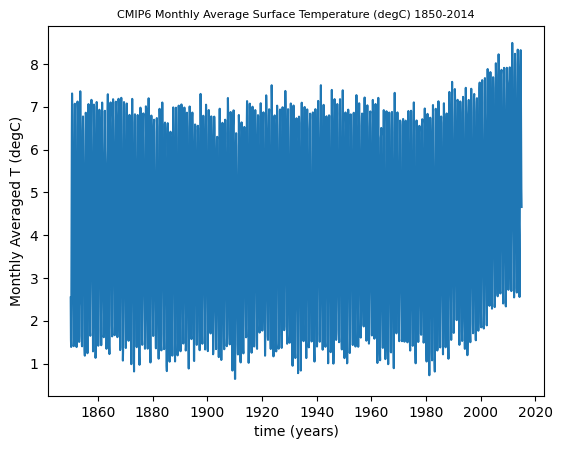

In [293]:
fig, ax = plt.subplots()

# direct plot using xarray functionality
cmip6[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax)

ax.set_title('CMIP6 Monthly Average Surface Temperature (degC) 1850-2014', fontsize=8)
ax.set_xlabel('time (years)')
ax.set_ylabel('Monthly Averaged T (degC)')

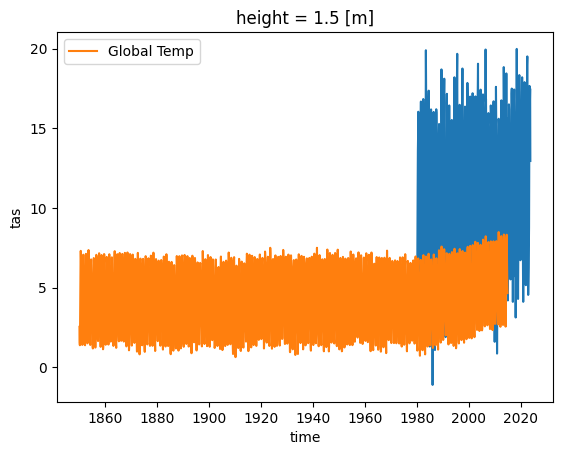

In [294]:
fig, ax = plt.subplots()

# direct plot using xarray functionality
era_cropped[VARIABLE][:, 0, :, :].mean(axis=(1, 2)).plot(ax=ax)

# cmip6 directly plotted using xarray func
cmip6[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax, label='Global Temp')

ax.legend(loc='best')

In [295]:
# the reason these graphs don't overlap is because CMIP is global temperature
# we need to crop the region is ~ hampshire if we want it to be relatable

In [296]:
cmip6

<xarray.Dataset>
Dimensions:    (time: 1980, lat: 144, lon: 192, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16 1850-02-16 ... 2014-12-17
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 2015-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.75 -88.75 ... 88.75 88.75 90.0
    lon_bnds   (lon, bnds) float64 0.0 1.875 1.875 3.75 ... 358.1 358.1 360.0
    tas        (time, lat, lon) float32 -24.27 -24.26 -24.29 ... -28.07 -28.09
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2019-06-19T11:21:17Z
    ...                     ...
    title:                  HadGEM3-GC31-LL output prepared for CMIP6
    variable_id:            tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/b6959414-d5ed-4cd9-a627-59238e52132d

In [297]:
cmip6[VARIABLE_CMIP].shape

(1980, 144, 192)

In [298]:
cmip6[VARIABLE_CMIP][0, :, :].sel(lat=slice(50, 52), lon=slice(350, 360))

<xarray.DataArray 'tas' (lat: 2, lon: 5)>
array([[9.036285 , 9.052887 , 7.6527405, 6.6402893, 6.3155823],
       [7.191559 , 7.5690002, 6.711334 , 4.2313538, 4.0692444]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 1850-01-16
  * lat      (lat) float64 50.62 51.88
  * lon      (lon) float64 351.6 353.4 355.3 357.2 359.1
    height   float64 1.5
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          degC
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-06-19T11:21:17Z altered by CMOR: Treated scalar dime...

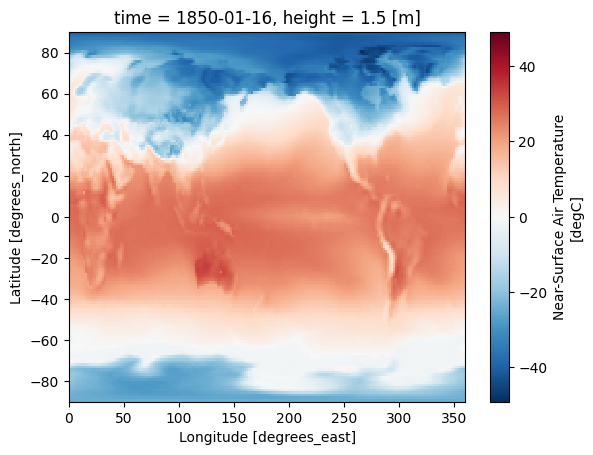

In [299]:
cmip6[VARIABLE_CMIP][0, :, :].plot()

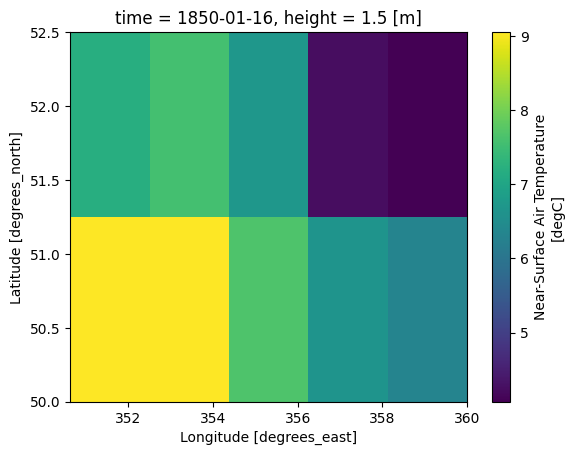

In [300]:
cmip6[VARIABLE_CMIP][0, :, :].sel(lat=slice(50, 52), lon=slice(350, 360)).plot()

In [301]:
cmip6_historic_cropped = cmip6.sel(lat=slice(50, 52), lon=slice(350, 360))

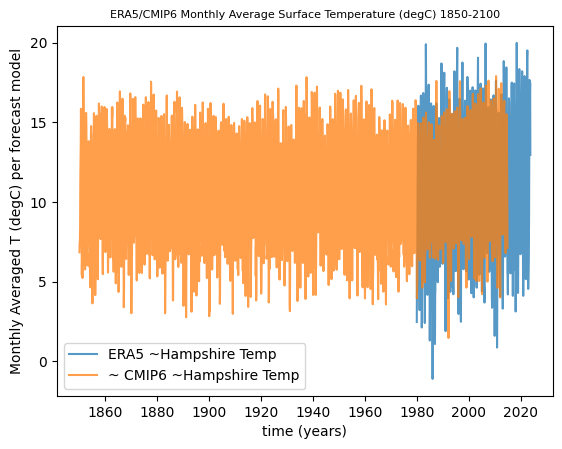

In [302]:
fig, ax = plt.subplots()

# direct plot using xarray functionality
era_cropped[VARIABLE][:, 0, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                         label='ERA5 ~Hampshire Temp',
                                                         alpha=0.75,
                                                         color='C0'
                                                         )

# cmip6 directly plotted using xarray func
cmip6_historic_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                      label='~ CMIP6 ~Hampshire Temp',
                                                                      alpha=0.75,
                                                                      color='C1'
                                                                      )
ax.set_title('ERA5/CMIP6 Monthly Average Surface Temperature (degC) 1850-2100', fontsize=8)
ax.set_xlabel('time (years)')
ax.set_ylabel('Monthly Averaged T (degC) per forecast model')
ax.legend(loc='best')

In [303]:
# lets now add CMIP6 Future
cmip6_future = xarray.open_dataset("../downloads/CMIP6/CMIP6_monthly_future/tas_Amon_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_20160116-21001216_v20200114.nc")
cmip6_future

<xarray.Dataset>
Dimensions:    (time: 1020, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 2016-01-16 00:00:00 ... 2100-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   59400.0
    branch_time_in_parent:  59400.0
    creation_date:          2020-01-13T08:51:11Z
    ...                     ...
    variable_id:            tas
    variable_name:          tas
    variant_label:          r1i1p1f3
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/bd489bc6-c257-4eb2-9a69-568d0a2c2eb0

In [304]:
print(f"CMIP6 from {cmip6_future.time.values.min().year} to {cmip6_future.time.values.max().year}.")

assert int(1020 / 12) == int(cmip6_future.time.values.max().year - cmip6_future.time.values.min().year)+1

CMIP6 from 2016 to 2100.


In [305]:
cmip6_future = cmip6_future.convert_calendar(calendar='gregorian',
                                             dim='time',
                                             align_on='year',
                                             missing=None,
                                             use_cftime=None)

In [306]:
# converting K to degC
cmip6_future[VARIABLE_CMIP].values = cmip6_future[VARIABLE_CMIP].values - 273.15
cmip6_future[VARIABLE_CMIP].attrs["units"] = 'degC'
cmip6_future[VARIABLE_CMIP].attrs['units']

'degC'

In [307]:
cmip6_future_cropped = cmip6_future.sel(lat=slice(50, 52),
                                        lon=slice(350, 360))

cmip6_future_cropped.dims

FrozenMappingWarningOnValuesAccess({'time': 1020, 'bnds': 2, 'lat': 2, 'lon': 5})

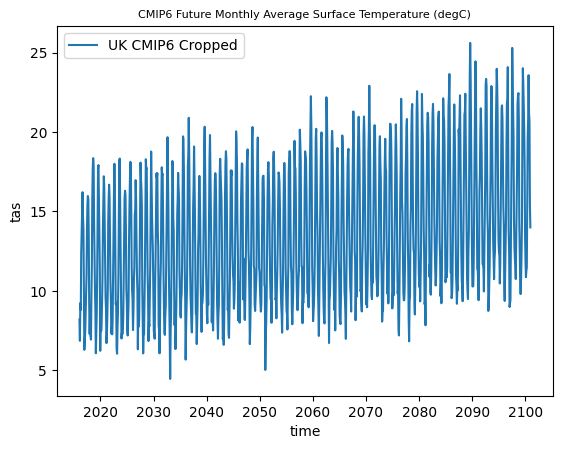

In [308]:
fig, ax = plt.subplots()

# cmip6 directly plotted using xarray func
cmip6_future_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                    label='UK CMIP6 Cropped')

ax.set_title('CMIP6 Future Monthly Average Surface Temperature (degC)', fontsize=8)
ax.legend(loc='best')

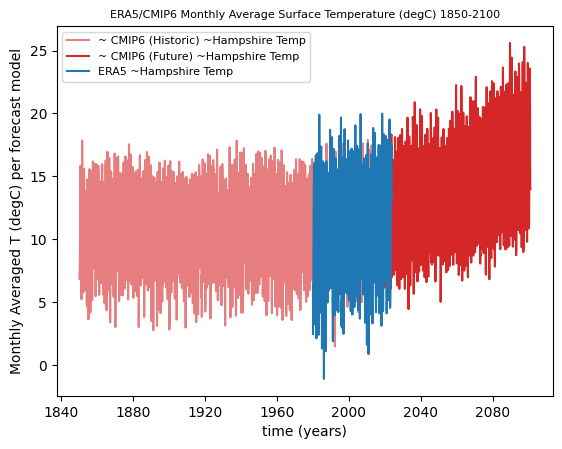

In [309]:
# Combining CMIP6 historic and Future and ERA5

fig, ax = plt.subplots()

# cmip6 directly plotted using xarray func
cmip6_historic_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                      label='~ CMIP6 (Historic) ~Hampshire Temp',
                                                                      alpha=0.6,
                                                                      color='C3',
                                                                      )

# cmip6 directly plotted using xarray func
cmip6_future_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                    label='~ CMIP6 (Future) ~Hampshire Temp',
                                                                    alpha=1,
                                                                    color='C3',
                                                                    )

# direct plot using xarray functionality
era_cropped[VARIABLE][:, 0, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                         label='ERA5 ~Hampshire Temp',
                                                         alpha=1,
                                                         color='C0',
                                                         )

ax.set_title('ERA5/CMIP6 Monthly Average Surface Temperature (degC) 1850-2100', fontsize=8)
ax.set_xlabel('time (years)')
ax.set_ylabel('Monthly Averaged T (degC) per forecast model')
ax.legend(loc='best', fontsize=8)

#### Adding in the UKCP18 data...

In [312]:
import glob 

xarray_stack = []
for i in tqdm(glob.glob('../downloads/UKCP18/*.nc')):
    # print(f"Processing UKCP18 data {i}...")
    xarray_stack.append(xarray.open_dataset(i))

len(xarray_stack)

100%|██████████| 100/100 [00:00<00:00, 173.76it/s]


100

In [313]:
ukcp18_data = xarray_stack[0]

for i in tqdm(range(1, len(xarray_stack))):
    tmp = xarray_stack[i]
    ukcp18_data = xarray.merge([ukcp18_data, tmp])

ukcp18_data.dims

100%|██████████| 99/99 [03:13<00:00,  1.96s/it]


FrozenMappingWarningOnValuesAccess({'ensemble_member': 1, 'time': 1200, 'grid_latitude': 606, 'grid_longitude': 484, 'bnds': 2})

In [314]:
ukcp18_data

<xarray.Dataset>
Dimensions:                     (ensemble_member: 1, time: 1200,
                                 grid_latitude: 606, grid_longitude: 484,
                                 bnds: 2)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-16 00:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float64 -4.683 -4.647 ... 8.063
  * grid_longitude              (grid_longitude) float64 353.9 354.0 ... 364.3
    ensemble_member_id          (ensemble_member) |S27 b'HadREM3-RA11M-r001i1...
    latitude                    (grid_latitude, grid_longitude) float64 47.44...
    longitude                   (grid_latitude, grid_longitude) float64 -11.4...
    month_number                (time) float64 12.0 1.0 2.0 ... 9.0 10.0 11.0
    year                        (time) float64 1.98e+03 1.981e+03 ... 2.08e+03
    yyyymm                      (time) object b'198012                       ...
Dimensions without coordinates: bnds
Data variables:
    tas                         (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 1980-12-01 00:00:00 ... 2...
    grid_latitude_bnds          (grid_latitude, bnds) float64 -4.701 ... 8.081
    grid_longitude_bnds         (grid_longitude, bnds) float64 353.9 ... 364.3
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2021-06-15T00:00:00
    domain:          uk
    frequency:       mon
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20210615
    Conventions:     CF-1.7

In [315]:
VARIABLE_UKCP18 = 'tas'
VARIABLE_UKCP18

'tas'

In [316]:
ukcp18_data[VARIABLE_UKCP18].dims

('ensemble_member', 'time', 'grid_latitude', 'grid_longitude')

Text(0.5, 1.0, 'grid overlay using explicit grid creation.')

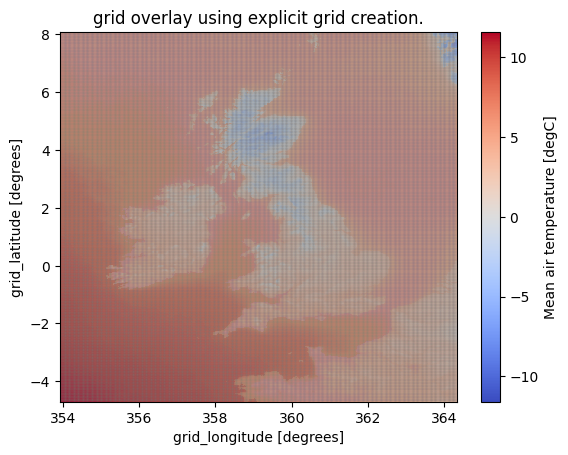

In [317]:
# plot manual grid using min, max, lat and long
fig, ax = plt.subplots()

ukcp18_data[VARIABLE_UKCP18][0, 0, :, :].plot(ax=ax, cmap='coolwarm')

Y = np.linspace(ukcp18_data.grid_latitude.values.min(), 
                ukcp18_data.grid_latitude.values.max(), 
                ukcp18_data.grid_latitude.size)

X = np.linspace(ukcp18_data.grid_longitude.values.min(), 
                ukcp18_data.grid_longitude.values.max(), 
                ukcp18_data.grid_longitude.size)

xx2, yy2 = np.meshgrid(X, Y)
ax.scatter(xx2, yy2, marker='o', color='grey', s=1, alpha=0.05)

ax.set_title("grid overlay using explicit grid creation.")

Text(0.5, 1.0, 'grid overlay using UKCP18 vals grid creation.')

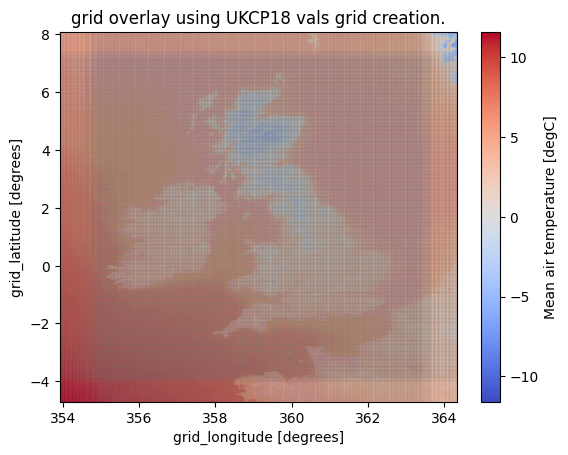

In [318]:
# plot ukcp18 grid explicitly made coords
fig, ax = plt.subplots()

ukcp18_data[VARIABLE_UKCP18][0, 0, :, :].plot(ax=ax, cmap='coolwarm')

xx, yy = np.meshgrid(ukcp18_data.grid_longitude.values,
                     ukcp18_data.grid_latitude.values)

ax.scatter(xx, yy, marker='o', color='grey', s=1, alpha=0.05)

ax.set_title("grid overlay using UKCP18 vals grid creation.")

In [319]:
lat_lb, lat_ub = -1.75, -1.25
lon_lb, lon_ub = 360.5, 361.25

in_coords = []
for i, (x, y) in enumerate(zip(xx.flatten(), yy.flatten())):
    if ((x >= lon_lb) & (x <= lon_ub)) & ((y >= lat_lb) & (y <= lat_ub)):
        in_coords.append((x, y))

len(in_coords)

925

Text(0.5, 1.0, 'grid overlay using UKCP18 vals grid creation.')

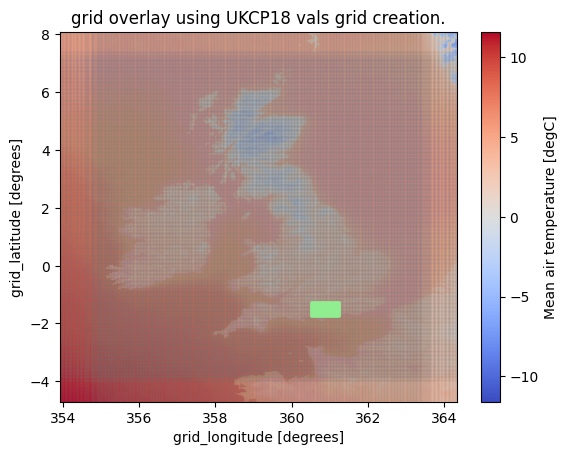

In [320]:
# plot ukcp18 grid explicitly made coords
fig, ax = plt.subplots()

ukcp18_data[VARIABLE_UKCP18][0, 0, :, :].plot(ax=ax, cmap='coolwarm')

xx, yy = np.meshgrid(ukcp18_data.grid_longitude.values,
                     ukcp18_data.grid_latitude.values)

ax.scatter(xx, yy, marker='o', color='grey', s=1, alpha=0.05)
ax.scatter([i[0] for i in in_coords], [i[-1] for i in in_coords], marker='*', color='lightgreen', s=0.5)

ax.set_title("grid overlay using UKCP18 vals grid creation.")

In [321]:
# lets slice the xarray data to this green box of grid coords
ukcp18_cropped = ukcp18_data.sel(grid_latitude=slice(-1.75, -1.25),
                                 grid_longitude=slice(360.5, 361.25))

ukcp18_cropped

<xarray.Dataset>
Dimensions:                     (ensemble_member: 1, time: 1200,
                                 grid_latitude: 25, grid_longitude: 37, bnds: 2)
Coordinates:
  * ensemble_member             (ensemble_member) int32 1
  * time                        (time) object 1980-12-16 00:00:00 ... 2080-11...
  * grid_latitude               (grid_latitude) float64 -1.74 -1.72 ... -1.26
  * grid_longitude              (grid_longitude) float64 360.5 360.5 ... 361.2
    ensemble_member_id          (ensemble_member) |S27 b'HadREM3-RA11M-r001i1...
    latitude                    (grid_latitude, grid_longitude) float64 50.76...
    longitude                   (grid_latitude, grid_longitude) float64 -1.69...
    month_number                (time) float64 12.0 1.0 2.0 ... 9.0 10.0 11.0
    year                        (time) float64 1.98e+03 1.981e+03 ... 2.08e+03
    yyyymm                      (time) object b'198012                       ...
Dimensions without coordinates: bnds
Data variables:
    tas                         (ensemble_member, time, grid_latitude, grid_longitude) float32 ...
    rotated_latitude_longitude  int32 -2147483647
    time_bnds                   (time, bnds) object 1980-12-01 00:00:00 ... 2...
    grid_latitude_bnds          (grid_latitude, bnds) float64 -1.75 ... -1.25
    grid_longitude_bnds         (grid_longitude, bnds) float64 360.5 ... 361.2
Attributes: (12/15)
    collection:      land-cpm
    contact:         ukcpproject@metoffice.gov.uk
    creation_date:   2021-06-15T00:00:00
    domain:          uk
    frequency:       mon
    institution:     Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, D...
    ...              ...
    resolution:      2.2km
    scenario:        rcp85
    source:          UKCP18 realisation from a set of 12 convection-permittin...
    title:           UKCP18 land projections - 2.2km convection-permitting cl...
    version:         v20210615
    Conventions:     CF-1.7

In [322]:
ukcp18_cropped[VARIABLE_UKCP18].shape

(1, 1200, 25, 37)

In [325]:
ukcp18_cropped[VARIABLE_UKCP18].shape

(1, 1200, 25, 37)

In [330]:
ukcp18_cropped.time  # need to conver this

<xarray.DataArray 'time' (time: 1200)>
array([cftime.Datetime360Day(1980, 12, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 1, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(1981, 2, 16, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.Datetime360Day(2080, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2080, 10, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.Datetime360Day(2080, 11, 16, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time          (time) object 1980-12-16 00:00:00 ... 2080-11-16 00:00:00
    month_number  (time) float64 12.0 1.0 2.0 3.0 4.0 ... 7.0 8.0 9.0 10.0 11.0
    year          (time) float64 1.98e+03 1.981e+03 ... 2.08e+03 2.08e+03
    yyyymm        (time) object b'198012                                     ...
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time

In [331]:
ukcp18_cropped = ukcp18_cropped.convert_calendar(calendar='gregorian',
                                                 dim='time',
                                                 align_on='year',
                                                 missing=None,
                                                 use_cftime=None)

In [334]:
ukcp18_cropped[VARIABLE_UKCP18].shape

(1, 1200, 25, 37)

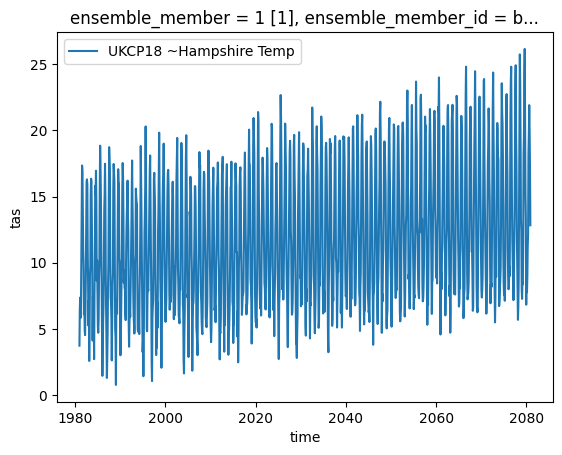

In [335]:
fig, ax = plt.subplots()

# direct plot using xarray functionality
ukcp18_cropped[VARIABLE_UKCP18][0, :, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                label='UKCP18 ~Hampshire Temp',
                                                                alpha=1,
                                                                color='C0',
                                                                )
ax.legend(loc='best')


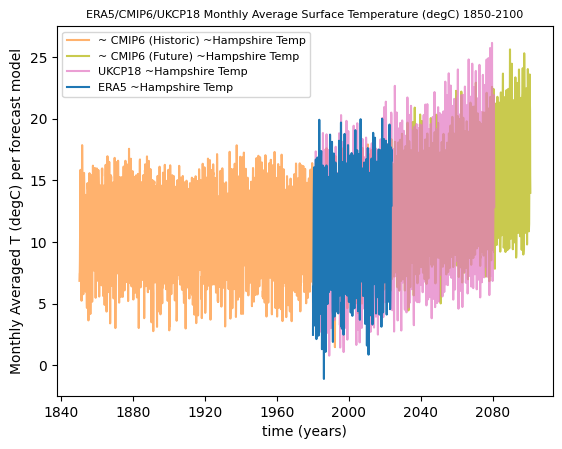

In [360]:
# Combining CMIP6 historic and Future and ERA5 and ukcp18

fig, ax = plt.subplots()

# Historic CMIP6
cmip6_historic_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                      label='~ CMIP6 (Historic) ~Hampshire Temp',
                                                                      alpha=0.6,
                                                                      color='C1',
                                                                      )

# CMIP6
cmip6_future_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                    label='~ CMIP6 (Future) ~Hampshire Temp',
                                                                    alpha=0.8,
                                                                    color='C8',
                                                                    )

# UKCP18
ukcp18_cropped[VARIABLE_UKCP18][0, :, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                   label='UKCP18 ~Hampshire Temp',
                                                                   alpha=0.7,
                                                                   color='C6',
                                                                   )

# ERA5
era_cropped[VARIABLE][:, 0, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                         label='ERA5 ~Hampshire Temp',
                                                         alpha=1,
                                                         color='C0',
                                                         )

ax.set_title('ERA5/CMIP6/UKCP18 Monthly Average Surface Temperature (degC) 1850-2100', fontsize=8)
ax.set_xlabel('time (years)')
ax.set_ylabel('Monthly Averaged T (degC) per forecast model')
ax.legend(loc='best', fontsize=8)

#### Now lets add the yearly means...

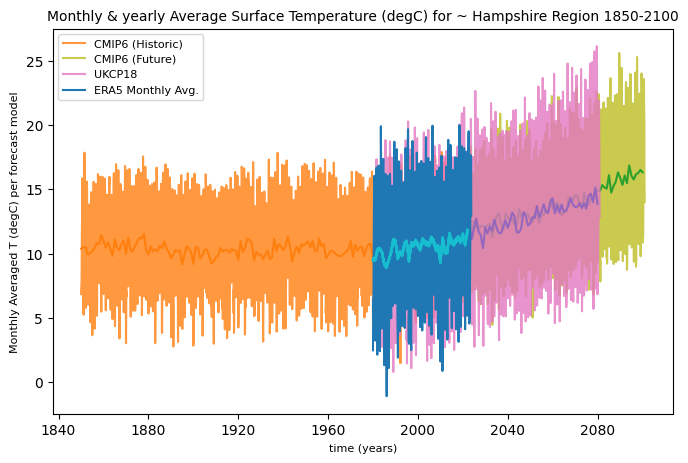

In [430]:
# Combining CMIP6 historic and Future and ERA5 and ukcp18

fig, ax = plt.subplots(figsize=(8, 5))

# Historic CMIP6
cmip6_historic_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                      label='CMIP6 (Historic)',
                                                                      alpha=0.8,
                                                                      color='C1',
                                                                      )

yr_mu_cmip6_hist = cmip6_historic_cropped[VARIABLE_CMIP][:, :, :].values.reshape(165, 12, 2, 5).mean(axis=(1, 2, 3))
ax.plot(cmip6_historic_cropped.time.values[0::12], yr_mu_cmip6_hist, color='C1')

# CMIP6
cmip6_future_cropped[VARIABLE_CMIP][:, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                    label='CMIP6 (Future)',
                                                                    alpha=0.8,
                                                                    color='C8',
                                                                    )

yr_mu_cmip6_hist = cmip6_future_cropped[VARIABLE_CMIP][:, :, :].values.reshape(85, 12, 2, 5).mean(axis=(1, 2, 3))
ax.plot(cmip6_future_cropped.time.values[0::12], yr_mu_cmip6_hist, color='C12')

# UKCP18
ukcp18_cropped[VARIABLE_UKCP18][0, :, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                                   label='UKCP18',
                                                                   alpha=0.8,
                                                                   color='C6',
                                                                   )

mu_yr_ukcp18 = ukcp18_cropped[VARIABLE_UKCP18][0, :, :, :].values.reshape(100, 12, 25, 37).mean(axis=(1, 2, 3))
ax.plot(ukcp18_cropped.time.values[0::12], mu_yr_ukcp18, color='C4')


# ERA5
era_cropped[VARIABLE][:, 0, :, :].mean(axis=(1, 2)).plot(ax=ax,
                                                         label='ERA5 Monthly Avg.',
                                                         alpha=1,
                                                         color='C0',
                                                         )
mu_yr_era5 = era_cropped[VARIABLE][:, 0, :, :].values.reshape(44, 12, 7, 15).mean(axis=(1, 2))
ax.plot(era_cropped.time.values[0::12], mu_yr_era5, color='C9')

ax.set_title('Monthly & yearly Average Surface Temperature (degC) for ~ Hampshire Region 1850-2100', fontsize=10)
ax.set_xlabel('time (years)', fontsize=8)
ax.set_ylabel('Monthly Averaged T (degC) per forecast model', fontsize=8)
ax.legend(loc='best', fontsize=8)

### END OF SCRIPT